## Applications (Part I): Processing corpus data using *NLTK*, *numpy*, and *matplotlib*
At this point, we are ready to take our learned tools to look at some instances of real-world research applications for programming. In today's session, we will use several Python packages, specifically the Natural Language Toolkit (NLTK), NumPy, and MatPlotLib, to analyze large natural language corpora for ....

### Laying the ground work: used packages

#### NLTK

NLTK is yet another instance of a package for natural language processing (https://www.nltk.org/). It is more generalized than *polyglot*, housing a number of resources for dealing with any kind of human language data:

- interfaces to many corpora and lexical resources
- text processing libraries for classification, tokenization, stemming, tagging, parsing
- wrappers for industrial-strength NLP libraries
- great documentation

##### Installation and use

From the conda powershell, execute this command:

        conda install nltk

To download packages and corpora included in nltk, open a Python console and execute the following:

        import nltk
        nltk.download()

In the window that appears, double click on **book** and **popular** to download a selection of commonly used packages. Or browse the full selection of corpora and packages.

#### NumPy

NumPy is an extremely popular package for scientific computing in Python (https://numpy.org/). 

- provides a multidimensional array object
- ...along with derived objects (such as masked arrays and matrices)
- provides methods for fast operations on arrays (mathematical, shape manipulation, sorting, selecting, basic linear algebra, basic statistical operations)

##### Installation and use

The numpy packages comes as a pre-installed library (https://numpy.org/) with Anaconda/miniconda. To use it, just use the import statement:

        import numpy

#### Matplotlib

Matplotlib provides a comprehensive set of tools to visualize data in static, animated, or interactive plots (https://matplotlib.org/stable/index.html). 

##### Installation and use

From the conda powershell, execute this command:

        conda install matplotlib
      
Then use the import statement to use itin your python prgramme:

        import matplotlib

### Processing parallel corpus data using NLTK

NLTK can serve as **interface to a range of corpora** ( = huge natural language data bases, sometimes tagged and annotated for various properties, e.g., POS, dependency relations, text genre, ...). The *nltk.corpus* package provides *readers* that allow you to process diverse types of corpus data.

Some of the corpora in NLTK include:

|Corpus |	Contents |
|---|---|
|Brown Corpus 	| 15 genres, 1.15M words, tagged, categorized |
|Project Gutenberg (selections)  |	18 literary texts, 2M words |
|Movie Reviews 	| 2k movie reviews with sentiment polarity classification |
|NPS Chat Corpus |	 	10k IM chat posts, POS-tagged and dialogue-act tagged |
|Question Classification 	|	6k questions, categorized |
|Shakespeare texts (selections) | 	8 books in XML format |
|Univ Decl of Human Rights 	|	480k words, 300+ languages |
|Penn Treebank (selections) | 	40k words, tagged and parsed |


We will look at a sample of the ***Europarl* corpus**, a parallel corpus of speeches in the proceedings of the European Parliament. The full corpus **includes versions in 21 European languages**: Romanic (French, Italian, Spanish, Portuguese, Romanian), Germanic (English, Dutch, German, Danish, Swedish), Slavik (Bulgarian, Czech, Polish, Slovak, Slovene), Finni-Ugric (Finnish, Hungarian, Estonian), Baltic (Latvian, Lithuanian), and Greek. NLTK includes a sample of 10 documents in 11 languages.

In [1]:
import nltk

from nltk.corpus import europarl_raw

#load any of the available language data
en = europarl_raw.english
ger = europarl_raw.german

First, we should get an overview of the data we are dealing with. The **Europarl corpus data comes as a set of plaintext documents**. NLTK comes equipped with a **corpus reader methods** that allow us to extract the following information: a plaintext corpus like this one can be split into a **list of its words**, its **sentences** (as nested list of its sentences each being a list of words), or its **chapters** (as nested list of chapters each being a list of sentences as a list of words).

In [2]:
#let's find out how many words and sentences they contain. To do so, call the methods :
print(en.words()) #the method words() returns a list of words
print(ger.sents()) #the method sents() returns a list of sentences as nested lists

#the English version uses more words than the German one
print(len(en.words())) 
print(len(ger.words()))

['Resumption', 'of', 'the', 'session', 'I', 'declare', ...]
[['Wiederaufnahme', 'der', 'Sitzungsperiode', 'Ich', 'erkläre', 'die', 'am', 'Freitag', ',', 'dem', '17.', 'Dezember', 'unterbrochene', 'Sitzungsperiode', 'des', 'Europäischen', 'Parlaments', 'für', 'wiederaufgenommen', ',', 'wünsche', 'Ihnen', 'nochmals', 'alles', 'Gute', 'zum', 'Jahreswechsel', 'und', 'hoffe', ',', 'daß', 'Sie', 'schöne', 'Ferien', 'hatten', '.'], ['Wie', 'Sie', 'feststellen', 'konnten', ',', 'ist', 'der', 'gefürchtete', '"', 'Millenium-Bug', '"', 'nicht', 'eingetreten', '.'], ...]
556326
556226


Our goal will be to extract **frequency information** about words in each of these languages. We will look at epistemic modal adverbs, that is, adverbs indicating the probability of the proposition they are modifying.

English and German have a large inventory of epistemic modal expressions, including adverbs ('possibly'), adjectives ('possible'), verbs ('might', 'must'), and particles (German *wohl*, roughly 'probably'). We can select a few and check how they are distributed within the corpus:  

In [3]:
fdist = nltk.FreqDist(w.lower() for w in en.words())

epistemic_modal_adverbs = ['maybe', 'probably', 'definitely', 'certainly', 'necessarily']
for m in epistemic_modal_adverbs:
    print('\n', m + ':', fdist[m], end=' ')

print('\n')

fdist2 = nltk.FreqDist(w.lower() for w in ger.words())
epistemic_modal_adverbs_ger = ['vielleicht','wahrscheinlich','definitiv','sicherlich','zwangsläufig']

for m in epistemic_modal_adverbs_ger:
    print('\n', m + ':', fdist2[m], end=' ')


 maybe: 8 
 probably: 53 
 definitely: 18 
 certainly: 173 
 necessarily: 28 


 vielleicht: 153 
 wahrscheinlich: 48 
 definitiv: 3 
 sicherlich: 80 
 zwangsläufig: 30 

In [4]:
i = 0
for w in en.sents():
    if 'necessarily' in w:
        print (i,w)
    i +=1

print('\n')
i = 0
for w in ger.sents():
    if 'zwangsläufig' in w:
        print (i,w)
    i +=1

583 ['Next', ',', 'we', 'all', 'too', 'often', 'see', 'vast', 'sums', 'of', 'money', 'being', 'spent', 'on', 'projects', 'whose', 'outcomes', 'will', 'necessarily', 'be', 'unclear', 'at', 'the', 'start', 'of', 'the', 'programme', 'period', '.']
646 ['Concerning', 'the', 'most', 'remote', 'regions', ',', 'it', 'was', 'only', 'quite', 'belatedly', 'that', 'we', 'received', 'the', 'memorandums', 'from', 'the', 'various', 'governments', ',', 'but', 'this', 'is', 'not', 'necessarily', 'an', 'excuse', ',', 'just', 'an', 'explanation', '.']
869 ['On', 'this', 'point', 'which', 'is', 'of', 'personal', 'interest', 'to', 'me', ',', 'let', 'me', 'remind', 'you', 'that', 'the', 'small', 'scale', 'of', 'this', 'sector', '-', 'and', 'this', 'does', 'not', 'necessarily', 'mean', 'that', 'it', 'is', 'an', 'insignificant', 'area', '-', 'and', 'its', 'concentration', 'in', 'a', 'limited', 'number', 'of', 'regions', 'do', 'not', 'make', 'it', 'easy', 'to', 'analyse', 'in', 'a', 'regional', 'context', '.'

6777 ['Wir', 'sollten', 'uns', 'alle', 'einer', 'Sache', 'bewußt', 'sein', ':', 'Zwischen', 'Rat', 'und', 'Parlament', ',', 'zwischen', 'den', 'Ratsmitgliedern', 'und', 'den', 'Mitgliedern', 'dieses', 'Parlaments', 'besteht', 'nicht', 'zwangsläufig', 'eine', 'Diskrepanz', 'in', 'bezug', 'auf', 'die', 'Vor-', 'oder', 'Nachteile', 'der', 'Transparenz', '.']
7648 ['Unser', 'Kollege', 'Dominique', 'Souchet', 'hat', 'daher', 'fünf', 'Änderungsanträge', 'eingereicht', ',', 'mit', 'denen', 'unterstrichen', 'werden', 'soll', ',', 'daß', 'die', 'Fangkapazitäten', 'angepaßt', 'und', 'nicht', 'zwangsläufig', 'systematisch', 'reduziert', 'werden', 'müssen', '.']
7913 ['Ein', 'Problem', 'besteht', 'darin', ',', 'daß', 'Käufer', 'und', 'Nutzer', 'von', 'Leuchten', 'nicht', 'zwangsläufig', 'identisch', 'sind', '.']
7939 ['Hinzugefügt', 'sei', ',', 'daß', 'der', 'Industrie', 'bereits', 'seit', '1992', 'klar', 'war', ',', 'daß', 'es', 'zwangsläufig', 'zu', 'Änderungen', 'kommen', 'wird', '.']
10873 ['I

One **obvious issue with the present corpus** is that the sentences are not perfectly aligned. Nonetheless, we can see that there are a few **matching translations**:

In [5]:
print('\n', en.sents()[998])
print('\n', ger.sents()[1042])


 ['But', 'optimum', 'efficiency', 'does', 'not', 'necessarily', 'come', 'about', 'of', 'its', 'own', 'accord', '.']

 ['Optimale', 'Effizienz', 'stellt', 'sich', 'aber', 'nicht', 'zwangsläufig', 'von', 'allein', 'ein', '.']


**In other cases, translations do not match as well.** In the following case, what is communicated with an epistemic modal adverb in German is communicated with an adjective in English. Note, though, that there appears to be a slight shift in meaning between these sentences:

1. a. *...resulting in inevitable delays and underspends...*<br>
b. *...was zwangsläufig Verzögerungen und Nichtausschöpfung der Mitel zur Folge hat...*<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; which necessarily delays and non-exhaustive-use the<sub>GEN</sub> funds as consequence has


In [6]:
print('\n', en.sents()[464])
print('\n', ger.sents()[490])


 ['They', 'should', 'not', 'be', 'about', 'shifting', 'priorities', 'and', 'policies', 'halfway', 'through', 'project', 'development', ',', 'resulting', 'in', 'inevitable', 'delays', 'and', 'underspends', ',', 'particularly', 'in', 'the', 'light', 'of', 'the', 'new', 'budgetary', 'requirement', '.']

 ['Es', 'sollte', 'nicht', 'darum', 'gehen', ',', 'auf', 'halbem', 'Wege', 'Änderungen', 'an', 'den', 'Prioritäten', 'und', 'Politiken', 'vorzunehmen', ',', 'was', 'zwangsläufig', 'Verzögerungen', 'und', 'Nichtausschöpfung', 'der', 'Mittel', 'zur', 'Folge', 'hat', '.']


#### Plotting word length information using *matplotlib*

In the following, we will visually compare the length of words in the German and English variants of the corpus. German words tend to be longer than English ones due to the language's propensity to create compound nouns (e.g., *Schlitten* 'sledge' + *Hund* 'dog' = *Schlittenhund* 'sledge dog')

In [40]:
word_len_en = list(map(len, en.words()))
word_len_ger = list(map(len, ger.words()))

print(len(word_len_en))
print(len(word_len_ger))

556326
556226


In [41]:
b = [0]*(len(word_len_en)-len(word_len_ger))
word_len_ger = word_len_ger+b

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

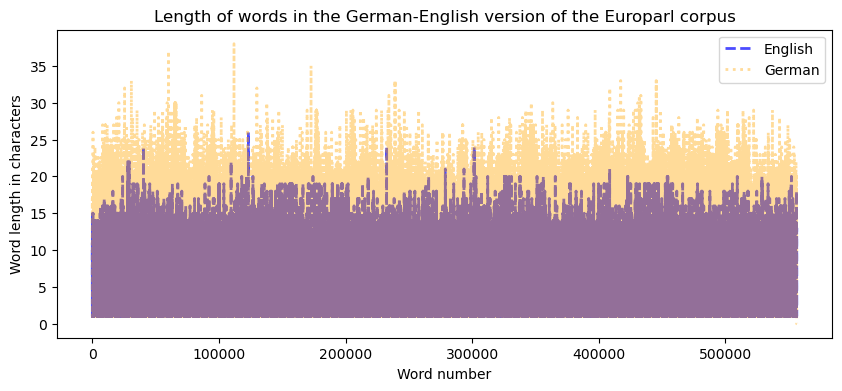

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))
x = np.arange(len(en.words()))
ax.plot(x, word_len_en, color='blue', linewidth=2, linestyle='--',alpha=0.7,label='English')
l, = ax.plot(x, word_len_ger, color='orange', linewidth=2,alpha=0.4, label = 'German')
l.set_linestyle(':');
ax.set_xlabel('Word number')
ax.set_ylabel('Word length in characters')
ax.set_title('Length of words in the German-English version of the Europarl corpus')
ax.legend();

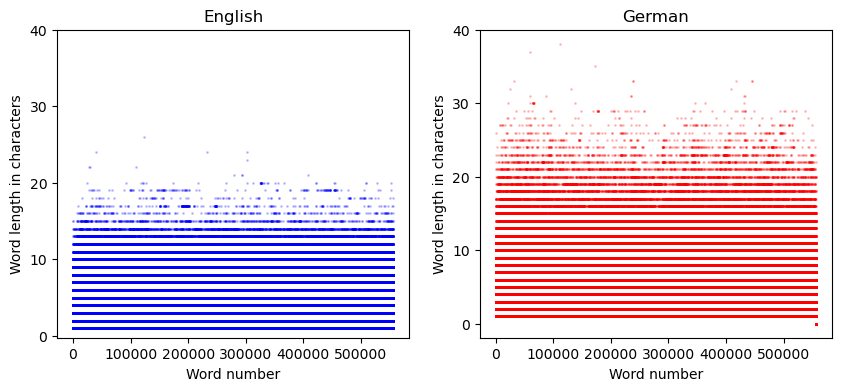

In [45]:
fig, axs = plt.subplots(1,2,figsize=(10, 4))
x = np.arange(len(en.words()))
axs[0].scatter(x, word_len_en, color='blue',s=1, alpha=0.2, label = 'English')
axs[1].scatter(x, word_len_ger, color='red',s = 1, alpha = 0.2, label = 'German')
axs[0].set_yticks([0, 10, 20, 30, 40]);
axs[1].set_yticks([0, 10, 20, 30, 40]);
axs[0].set_xlabel('Word number');
axs[0].set_ylabel('Word length in characters');
axs[1].set_xlabel('Word number');
axs[1].set_ylabel('Word length in characters');
axs[0].set_title('English');
axs[1].set_title('German');

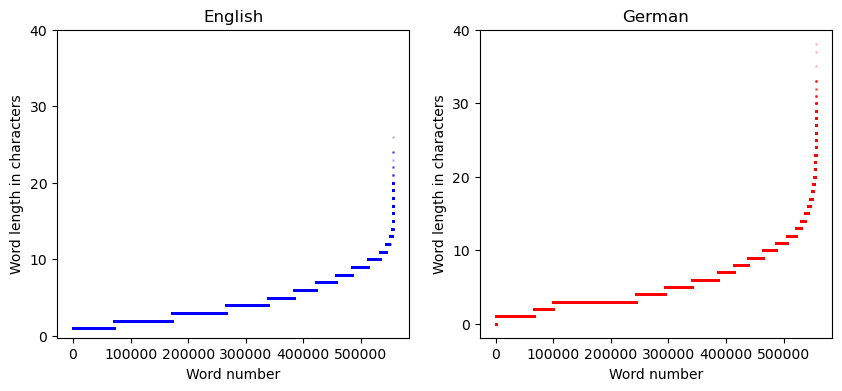

In [46]:
fig, axs = plt.subplots(1,2,figsize=(10, 4))
x = np.arange(len(en.words()))
axs[0].scatter(x, sorted(word_len_en), color='blue',s=1, alpha=0.2, label = 'English')
axs[1].scatter(x, sorted(word_len_ger), color='red',s = 1, alpha = 0.2, label = 'German')
axs[0].set_yticks([0, 10, 20, 30, 40]);
axs[1].set_yticks([0, 10, 20, 30, 40]);
axs[0].set_xlabel('Word number');
axs[0].set_ylabel('Word length in characters');
axs[1].set_xlabel('Word number');
axs[1].set_ylabel('Word length in characters');
axs[0].set_title('English');
axs[1].set_title('German');

### Parsing treebanks using NLTK

### Visualizing frequency information using numpy, NLTK, and matplotlib

In [ ]:
#.aligned_sents(en,ger)
#from nltk.corpus import brown
#news_text = brown.words(categories='news')
#print(news_text)

## Next session: Classes and inheritance

## Next session: Recursive programming + search

## Next session: Applications (Part II): Processing experimental data using *pandas* and ...